In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers import Dropout

> ### Training only on Answered Correctly and Part of Question (not encoded only scaled)

In [2]:
x = pd.read_csv('x.csv', header = None)
y = pd.read_csv('y.csv', header = None)
x2 = pd.read_csv('x2.csv', header = None)
x = np.array(x)
x2 = np.array(x2)
y = np.array(y)
y = y.reshape(y.shape[0])

x = x.reshape(297146, 29, 1)
x2 = x2.reshape(297146, 29, 1)
new_x = np.concatenate((x,x2), axis = 2)

In [3]:
new_x.shape

(297146, 29, 2)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.05, random_state = 64)

In [5]:
x_train.shape, y_train.shape

((282288, 29, 2), (282288,))

In [6]:
x_test.shape, y_test.shape

((14858, 29, 2), (14858,))

In [8]:
classifier = Sequential()

classifier.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 2)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [9]:
classifier.fit(x_train, y_train, epochs = 5, batch_size = 64, workers = 6) #0.6543

Epoch 1/5
4411/4411 [==============================] - 517s 117ms/step - loss: 0.6646
Epoch 2/5
4411/4411 [==============================] - 566s 128ms/step - loss: 0.6542
Epoch 3/5
4411/4411 [==============================] - 562s 127ms/step - loss: 0.6513
Epoch 4/5
4411/4411 [==============================] - 565s 128ms/step - loss: 0.6500
Epoch 5/5
4411/4411 [==============================] - 558s 127ms/step - loss: 0.6490


In [10]:
y_pred = classifier.predict(x_test)
y_pred_rounded = []
for i in y_pred:
    if i >= 0.5:
        y_pred_rounded.append(1)
    else:
        y_pred_rounded.append(0)
y_pred_rounded = np.array(y_pred_rounded)

In [12]:
accuracy_score(y_test, y_pred_rounded)

0.6182527931080899

> ### Training only on Answered Correctly and Part of Question (one hot encoded)

In [2]:
x = pd.read_csv('x.csv', header = None)
y = pd.read_csv('y.csv', header = None)
x = np.array(x)
y = np.array(y)
y = y.reshape(y.shape[0])

x = x.reshape(297146, 29, 1)

In [3]:
x3 = np.loadtxt("x_part.txt")
x3.shape

(297146, 174)

In [4]:
x3 = x3.reshape(297146, 29, 6)
x3[0:2]

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[0.,

In [5]:
new_x = np.concatenate((x,x3), axis = 2)

In [6]:
new_x.shape

(297146, 29, 7)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.05, random_state = 64)

In [8]:
x_train.shape, y_train.shape

((282288, 29, 7), (282288,))

In [9]:
x_test.shape, y_test.shape

((14858, 29, 7), (14858,))

In [10]:
classifier = Sequential()

classifier.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 7)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [11]:
classifier.fit(x_train, y_train, epochs = 5, batch_size = 64, workers = 6) #0.6543

Epoch 1/5
4411/4411 [==============================] - 533s 121ms/step - loss: 0.6614
Epoch 2/5
4411/4411 [==============================] - 569s 129ms/step - loss: 0.6514
Epoch 3/5
4411/4411 [==============================] - 590s 134ms/step - loss: 0.6497
Epoch 4/5
4411/4411 [==============================] - 613s 139ms/step - loss: 0.6484
Epoch 5/5
4411/4411 [==============================] - 588s 133ms/step - loss: 0.6477


In [12]:
y_pred = classifier.predict(x_test)
y_pred_rounded = []
for i in y_pred:
    if i >= 0.5:
        y_pred_rounded.append(1)
    else:
        y_pred_rounded.append(0)
y_pred_rounded = np.array(y_pred_rounded)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test, y_pred_rounded)

array([[4051, 3408],
       [2237, 5162]], dtype=int64)

>> #### Training Multiple epochs

In [11]:
classifier.fit(x_train, y_train, epochs = 100, batch_size = 64, workers = 6)

Epoch 1/100
4411/4411 [==============================] - 515s 117ms/step - loss: 0.6638
Epoch 2/100
4411/4411 [==============================] - 523s 119ms/step - loss: 0.6518
Epoch 3/100
4411/4411 [==============================] - 504s 114ms/step - loss: 0.6496
Epoch 4/100
4411/4411 [==============================] - 505s 114ms/step - loss: 0.6487
Epoch 5/100
4411/4411 [==============================] - 504s 114ms/step - loss: 0.6478
Epoch 6/100
4411/4411 [==============================] - 519s 118ms/step - loss: 0.6473
Epoch 7/100
4411/4411 [==============================] - 528s 120ms/step - loss: 0.6466
Epoch 8/100
4411/4411 [==============================] - 518s 117ms/step - loss: 0.6461
Epoch 9/100
4411/4411 [==============================] - 515s 117ms/step - loss: 0.6459
Epoch 10/100
4411/4411 [==============================] - 517s 117ms/step - loss: 0.6456
Epoch 11/100
2356/4411 [===============>..............] - ETA: 4:06 - loss: 0.6450

KeyboardInterrupt: 

> ### Training on Answered Correctly, Prior Question Had Explanation and Part (one hot encoded)

In [2]:
x = pd.read_csv('x.csv', header = None)
y = pd.read_csv('y.csv', header = None)
x1 = pd.read_csv('x1.csv', header = None)
x = np.array(x)
x1 = np.array(x1)
y = np.array(y)
y = y.reshape(y.shape[0])

x = x.reshape(297146, 29, 1)
x1 = x1.reshape(297146, 29, 1)
new_x = np.concatenate((x,x1), axis = 2)

In [3]:
x3 = np.loadtxt("x_part.txt")
x3.shape

(297146, 174)

In [4]:
x3 = x3.reshape(297146, 29, 6)
new_x = np.concatenate((new_x,x3), axis = 2)
new_x.shape

(297146, 29, 8)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.05, random_state = 64)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((282288, 29, 8), (282288,), (14858, 29, 8), (14858,))

In [6]:
classifier = Sequential()

classifier.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 8)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [12]:
classifier.fit(x_train, y_train, epochs = 5, batch_size = 64, workers = 6)

Epoch 1/5
4411/4411 [==============================] - 497s 113ms/step - loss: 0.6607
Epoch 2/5
4411/4411 [==============================] - 559s 127ms/step - loss: 0.6510
Epoch 3/5
4411/4411 [==============================] - 560s 127ms/step - loss: 0.6490
Epoch 4/5
4411/4411 [==============================] - 590s 134ms/step - loss: 0.6475
Epoch 5/5
4411/4411 [==============================] - 601s 136ms/step - loss: 0.6470


In [13]:
y_pred = classifier.predict(x_test)
y_pred_rounded = []
for i in y_pred:
    if i >= 0.5:
        y_pred_rounded.append(1)
    else:
        y_pred_rounded.append(0)
y_pred_rounded = np.array(y_pred_rounded)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test, y_pred_rounded)

array([[4286, 3173],
       [2451, 4948]], dtype=int64)

In [15]:
accuracy_score(y_test, y_pred_rounded)

0.6214833759590793

>> #### Training multiple epochs

In [7]:
classifier.fit(x_train, y_train, epochs = 100, batch_size = 64, workers = 6)

Epoch 1/100
4411/4411 [==============================] - 569s 129ms/step - loss: 0.6631
Epoch 2/100
4411/4411 [==============================] - 575s 130ms/step - loss: 0.6519
Epoch 3/100
4411/4411 [==============================] - 539s 122ms/step - loss: 0.6491
Epoch 4/100
4411/4411 [==============================] - 519s 118ms/step - loss: 0.6480
Epoch 5/100
4411/4411 [==============================] - 526s 119ms/step - loss: 0.6470
Epoch 6/100
4411/4411 [==============================] - 514s 117ms/step - loss: 0.6463
Epoch 7/100
4411/4411 [==============================] - 513s 116ms/step - loss: 0.6458
Epoch 8/100
4411/4411 [==============================] - 514s 116ms/step - loss: 0.6453
Epoch 9/100
4411/4411 [==============================] - 515s 117ms/step - loss: 0.6447
Epoch 10/100
4411/4411 [==============================] - 523s 118ms/step - loss: 0.6447
Epoch 11/100
4411/4411 [==============================] - 516s 117ms/step - loss: 0.6438
Epoch 12/100
4411/4411 [======

KeyboardInterrupt: 

> ### Changing Random State

In [2]:
x = pd.read_csv('x.csv', header = None)
y = pd.read_csv('y.csv', header = None)
x1 = pd.read_csv('x1.csv', header = None)
x = np.array(x)
x1 = np.array(x1)
y = np.array(y)
y = y.reshape(y.shape[0])

x = x.reshape(297146, 29, 1)
x1 = x1.reshape(297146, 29, 1)
new_x = np.concatenate((x,x1), axis = 2)

In [3]:
x3 = np.loadtxt("x_part.txt")
x3.shape

(297146, 174)

In [4]:
x3 = x3.reshape(297146, 29, 6)
new_x = np.concatenate((new_x,x3), axis = 2)
new_x.shape

(297146, 29, 8)

>> #### Random State = 1

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.05, random_state = 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((282288, 29, 8), (282288,), (14858, 29, 8), (14858,))

In [6]:
classifier = Sequential()

classifier.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 8)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [7]:
classifier.fit(x_train, y_train, epochs = 20, batch_size = 64, workers = 6)

Epoch 1/20
4411/4411 [==============================] - 509s 115ms/step - loss: 0.6642
Epoch 2/20
4411/4411 [==============================] - 807s 183ms/step - loss: 0.6520
Epoch 3/20
4411/4411 [==============================] - 804s 182ms/step - loss: 0.6494
Epoch 4/20
4411/4411 [==============================] - 783s 177ms/step - loss: 0.6481
Epoch 5/20
4411/4411 [==============================] - 489s 111ms/step - loss: 0.6473
Epoch 6/20
4411/4411 [==============================] - 491s 111ms/step - loss: 0.6465
Epoch 7/20
4411/4411 [==============================] - 491s 111ms/step - loss: 0.6463
Epoch 8/20
4411/4411 [==============================] - 492s 111ms/step - loss: 0.6456
Epoch 9/20
4411/4411 [==============================] - 492s 112ms/step - loss: 0.6451
Epoch 10/20
4411/4411 [==============================] - 491s 111ms/step - loss: 0.6447
Epoch 11/20
4411/4411 [==============================] - 492s 111ms/step - loss: 0.6441
Epoch 12/20
4411/4411 [==================

KeyboardInterrupt: 

>> #### Random State = 20

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.05, random_state = 20)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((282288, 29, 8), (282288,), (14858, 29, 8), (14858,))

In [6]:
classifier = Sequential()

classifier.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 8)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [7]:
classifier.fit(x_train, y_train, epochs = 20, batch_size = 64, workers = 6)

Epoch 1/20
4411/4411 [==============================] - 502s 114ms/step - loss: 0.6670
Epoch 2/20
4411/4411 [==============================] - 517s 117ms/step - loss: 0.6533
Epoch 3/20
4411/4411 [==============================] - 499s 113ms/step - loss: 0.6508
Epoch 4/20
4411/4411 [==============================] - 489s 111ms/step - loss: 0.6488
Epoch 5/20
4411/4411 [==============================] - 504s 114ms/step - loss: 0.6482
Epoch 6/20
2517/4411 [================>.............] - ETA: 3:42 - loss: 0.6465

KeyboardInterrupt: 

> ### Implementing GRU

In [ ]:
classifier = Sequential()

classifier.add(GRU(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 8)))
classifier.add(Dropout(0.2))

classifier.add(GRU(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(GRU(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(GRU(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(GRU(units = 128))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [7]:
classifier.fit(x_train, y_train, epochs = 5, batch_size = 128, workers = 6)

Epoch 1/5
2206/2206 [==============================] - 381s 172ms/step - loss: 0.6621
Epoch 2/5
2206/2206 [==============================] - 392s 177ms/step - loss: 0.6519
Epoch 3/5
2206/2206 [==============================] - 411s 186ms/step - loss: 0.6498
Epoch 4/5
2206/2206 [==============================] - 405s 184ms/step - loss: 0.6487
Epoch 5/5
2206/2206 [==============================] - 386s 175ms/step - loss: 0.6477


> ### Increasing Complexity of the Model

In [2]:
x = pd.read_csv('x.csv', header = None)
y = pd.read_csv('y.csv', header = None)
x1 = pd.read_csv('x1.csv', header = None)
x = np.array(x)
x1 = np.array(x1)
y = np.array(y)
y = y.reshape(y.shape[0])

x = x.reshape(297146, 29, 1)
x1 = x1.reshape(297146, 29, 1)
new_x = np.concatenate((x,x1), axis = 2)

x3 = np.loadtxt("x_part.txt")
x3.shape

x3 = x3.reshape(297146, 29, 6)
new_x = np.concatenate((new_x,x3), axis = 2)
new_x.shape

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.05, random_state = 64)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((282288, 29, 8), (282288,), (14858, 29, 8), (14858,))

In [4]:
classifier = Sequential()

classifier.add(LSTM(units = 256, return_sequences = True, input_shape = (x_train.shape[1], 8)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 256, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 256, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 256, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 256))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [5]:
classifier.fit(x_train, y_train, epochs = 200, batch_size = 128, workers = 6)

Epoch 1/200
2206/2206 [==============================] - 1363s 618ms/step - loss: 0.6685
Epoch 2/200
2206/2206 [==============================] - 1227s 556ms/step - loss: 0.6538
Epoch 3/200
2206/2206 [==============================] - 1227s 556ms/step - loss: 0.6513
Epoch 4/200
 395/2206 [====>.........................] - ETA: 5:54:26 - loss: 0.6492

KeyboardInterrupt: 

In [3]:
classifier = Sequential()

classifier.add(LSTM(units = 256, return_sequences = True, input_shape = (x_train.shape[1], 8)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 256, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 256, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 256, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 256))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [4]:
classifier.fit(x_train, y_train, epochs = 200, batch_size = 128, workers = 6)

Epoch 1/200
2206/2206 [==============================] - 1308s 593ms/step - loss: 0.6648
Epoch 2/200
2206/2206 [==============================] - 1261s 572ms/step - loss: 0.6523
Epoch 3/200
2206/2206 [==============================] - 1272s 577ms/step - loss: 0.6501
Epoch 4/200
2206/2206 [==============================] - 1245s 564ms/step - loss: 0.6492
Epoch 5/200
2206/2206 [==============================] - 1240s 562ms/step - loss: 0.6483
Epoch 6/200
2206/2206 [==============================] - 1269s 575ms/step - loss: 0.6474
Epoch 7/200
2206/2206 [==============================] - 1263s 573ms/step - loss: 0.6466
Epoch 8/200
2206/2206 [==============================] - 1254s 568ms/step - loss: 0.6460
Epoch 9/200
2206/2206 [==============================] - 1259s 571ms/step - loss: 0.6454
Epoch 10/200
2206/2206 [==============================] - 1280s 580ms/step - loss: 0.6450
Epoch 11/200
2206/2206 [==============================] - 1275s 578ms/step - loss: 0.6443
Epoch 12/200
2206/2

KeyboardInterrupt: 

In [5]:
y_pred = classifier.predict(x_test)
y_pred_rounded = []
for i in y_pred:
    if i >= 0.5:
        y_pred_rounded.append(1)
    else:
        y_pred_rounded.append(0)
y_pred_rounded = np.array(y_pred_rounded)

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test, y_pred_rounded)

array([[4490, 2969],
       [2605, 4794]], dtype=int64)

In [7]:
accuracy_score(y_test, y_pred_rounded)

0.6248485664288599

### Training the Model for 200 Epochs

In [2]:
x = pd.read_csv('x.csv', header = None)
y = pd.read_csv('y.csv', header = None)
x1 = pd.read_csv('x1.csv', header = None)
x = np.array(x)
x1 = np.array(x1)
y = np.array(y)
y = y.reshape(y.shape[0])

x = x.reshape(297146, 29, 1)
x1 = x1.reshape(297146, 29, 1)
new_x = np.concatenate((x,x1), axis = 2)

x3 = np.loadtxt("x_part.txt")
x3.shape

x3 = x3.reshape(297146, 29, 6)
new_x = np.concatenate((new_x,x3), axis = 2)
new_x.shape

(297146, 29, 8)

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.05, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((282288, 29, 8), (282288,), (14858, 29, 8), (14858,))

In [4]:
classifier = Sequential()

classifier.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 8)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 128))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [5]:
classifier.fit(x_train, y_train, epochs = 200 , batch_size = 64, workers = 6)

Epoch 1/200
4411/4411 [==============================] - 510s 116ms/step - loss: 0.6651
Epoch 2/200
4411/4411 [==============================] - 478s 108ms/step - loss: 0.6543
Epoch 3/200
4411/4411 [==============================] - 478s 108ms/step - loss: 0.6504
Epoch 4/200
4411/4411 [==============================] - 510s 116ms/step - loss: 0.6494
Epoch 5/200
4411/4411 [==============================] - 530s 120ms/step - loss: 0.6480
Epoch 6/200
4411/4411 [==============================] - 563s 128ms/step - loss: 0.6474
Epoch 7/200
4411/4411 [==============================] - 557s 126ms/step - loss: 0.6466
Epoch 8/200
4411/4411 [==============================] - 581s 132ms/step - loss: 0.6458
Epoch 9/200
4411/4411 [==============================] - 511s 116ms/step - loss: 0.6457
Epoch 10/200
4411/4411 [==============================] - 481s 109ms/step - loss: 0.6451
Epoch 11/200
4411/4411 [==============================] - 489s 111ms/step - loss: 0.6446
Epoch 12/200
4411/4411 [======

4411/4411 [==============================] - 459s 104ms/step - loss: 0.5543
Epoch 185/200
4411/4411 [==============================] - 456s 103ms/step - loss: 0.5466
Epoch 186/200
4411/4411 [==============================] - 464s 105ms/step - loss: 0.5625
Epoch 187/200
4411/4411 [==============================] - 461s 105ms/step - loss: 0.5505
Epoch 188/200
4411/4411 [==============================] - 459s 104ms/step - loss: 0.5585
Epoch 189/200
4411/4411 [==============================] - 457s 104ms/step - loss: 0.5464
Epoch 190/200
4411/4411 [==============================] - 459s 104ms/step - loss: 0.5427
Epoch 191/200
4411/4411 [==============================] - 469s 106ms/step - loss: 0.5621
Epoch 192/200
4411/4411 [==============================] - 499s 113ms/step - loss: 0.5492
Epoch 193/200
4411/4411 [==============================] - 501s 113ms/step - loss: 0.5500
Epoch 194/200
4411/4411 [==============================] - 480s 109ms/step - loss: 0.5492
Epoch 195/200
4411/4411 

Text(0, 0.5, 'Training Loss')

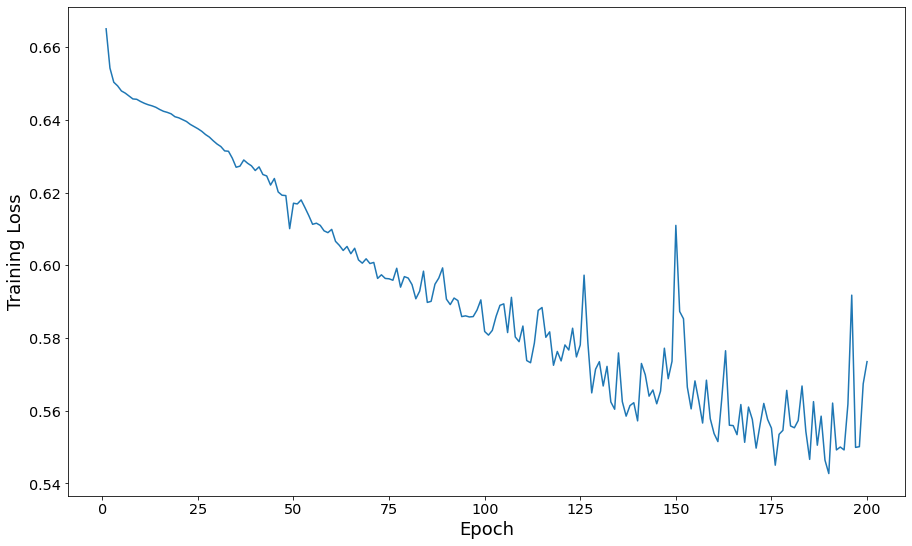

In [10]:
plt.figure(figsize=(15,9))
plt.plot(loss_data[0], loss_data[1])
plt.xlabel("Epoch", fontsize = 18)
plt.ylabel("Training Loss", fontsize = 18)

In [6]:
y_pred = classifier.predict(x_test)

In [8]:
y_pred_rounded = []
for i in y_pred:
    if i >= 0.5:
        y_pred_rounded.append(1)
    else:
        y_pred_rounded.append(0)
y_pred_rounded = np.array(y_pred_rounded)

In [29]:
accuracy_score(y_test, y_pred_rounded)

0.6978630321386505

In [15]:
classifier.save('E:\RNN_Saved')

INFO:tensorflow:Assets written to: E:\RNN_Saved\assets
